# Question 4 part 1
In this notebook I solve the first part of the question 4:
"Implement the explicit scheme (without matrix inversion) and reproduce Fig. 2.2 of M\&M. Use the vector set-up of Python in the code. Make similar plots as in Fig. 2.2 of M\&M, but display multiple time-profiles in one plot for fixed $\Delta t$."

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

### I start by defining the ploblem parameters

In [2]:
### Parameters ###
##bonduary conditions
u_x0 = 0
u_x1 = 0

## initial condition
def initial_condition (x):
    if (x >= 0 and x <= (1.0/2.0)):
        return 2.0*x
    elif (x > (1.0/2.0) and x <= 1.0):
        return 2.0 - (2.0*x)
    else: print("Error: x expected to be between 0 and 1")
    
##run parameters
J = 20
delta_x = 1.0/float(J)

delta_t_values = [0.0012, 0.0013]
x_values = []
for j in range(J+1):
    x = j*delta_x
    x_values.append(x)

## max parameter used to calculate the series of the exact result
M = 100

### Here I define the explicit scheme

In [3]:
def Un1_explicit_scheme (Un_vec,j, delta_t, delta_x):
    mu = delta_t/(delta_x*delta_x)
    return Un_vec[j] + (mu*(Un_vec[j+1] - (2.0*Un_vec[j]) + Un_vec[j-1]))
    

### Here I calculate the exact solution

In [4]:
def exact_sol(x,t,M):
    exact = 0
    for m in range(M,0, -1):
        exact = exact + (8.0/(m*m*np.pi*np.pi))*np.sin(m*np.pi/2.0)*(np.exp(-(m*m*np.pi*np.pi)*t))*(np.sin(m*np.pi*x))
        
    return exact

### Here I reproduce the Figure 2.2 of M&M

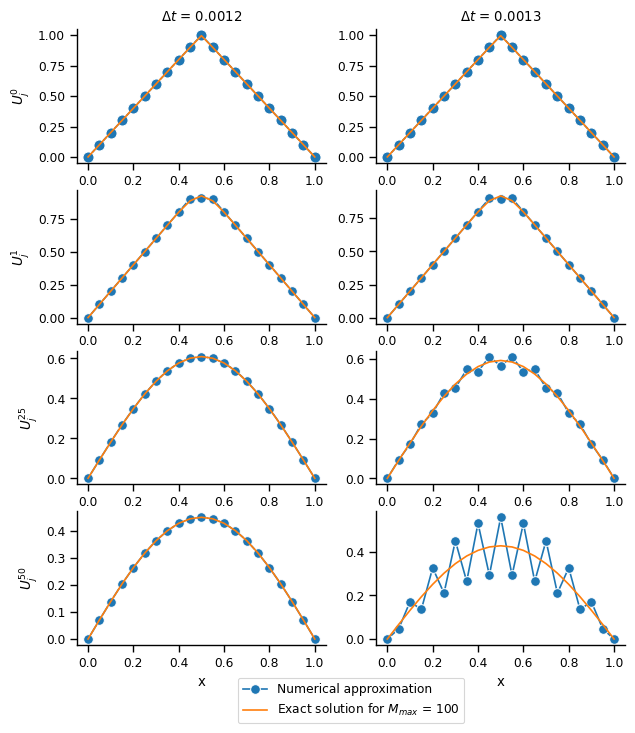

In [5]:
sns.set_context("paper")

h_plot = 2
v_plot = 4

fig, ax = plt.subplots(v_plot, h_plot, figsize=(7.08, 8))

time_steps = [0, 1, 25, 50]
for i in range(h_plot):
    delta_t = delta_t_values[i]
    ### time step t = 0 ###
    n=0
    #calculate the initial condition U0
    U0 = []
    for j in range(J+1): 
        x = j*delta_x
        U0.append(initial_condition (x))   
    #ploting the IC
    sns.lineplot(x=x_values, y=U0, #color = colours[9],
    marker='o', markersize = 8,
    ax = ax[0,i])
    ax[0,i].set_title(r"$\Delta t$ = " + str(delta_t))
   # for comparison I also calculate the exact value of u0
    exact = []
    for x in x_values:
        exact.append(exact_sol(x,n*delta_t,M))

    #ploting the exact value for the IC (which in this case is basically the same as up untill now I didn't do any approximation
    sns.lineplot(x=x_values, y=exact, #color = colours[1],
 
    ax = ax[0,i])

    ### time step t = delta_t ###
    n= 1
    #here I calculate the first row of results for n = 1 (U1)
    Un = [0]
    for j in range(1,J):
        Un.append(Un1_explicit_scheme (U0,j, delta_t, delta_x))    
    Un.append(0)
    #ploting the approximation for U1
    sns.lineplot(x=x_values, y=Un, 
    marker='o', markersize = 7,
    ax = ax[1,i]) 
    
    #then I calculate the exact value for u(x,delta_t)
    exact = []
    for x in x_values:
        exact.append(exact_sol(x,n*delta_t,M))
    sns.lineplot(x=x_values, y=exact,
    ax = ax[1,i])

    ### Here I will calculate the next steps until n = 25 ### 
    while n < 25:
        n = n+1
        Un1 = [0]
        for j in range(1,J):
            Un1.append(Un1_explicit_scheme (Un,j, delta_t, delta_x))   
        Un1.append(0)
        Un = Un1
    # here I plot the results for t = 25 * delta_t
    sns.lineplot(x=x_values, y=Un1, 
    marker='o', markersize = 7,
    ax = ax[2,i]) 
    # here I calculate and plot the exact solution for t = 25 * delta_t
    exact = []
    for x in x_values:
        exact.append(exact_sol(x,n*delta_t,M))
    sns.lineplot(x=x_values, y=exact,
    ax = ax[2,i])

     ### Here I will calculate the next steps until n = 50 ### 
    while n < 50:
        n = n+1
        Un1 = [0]
        for j in range(1,J):
            Un1.append(Un1_explicit_scheme (Un,j, delta_t, delta_x))
            
        Un1.append(0)
        Un = Un1
    # here I plot the results for t = 50 * delta_t
    sns.lineplot(x=x_values, y=Un1, 
    marker='o', markersize = 7,
    ax = ax[3,i], label = "Numerical approximation") 
    # here I calculate and plot the exact solution for t = 50 * delta_t
    exact = []
    for x in x_values:
        exact.append(exact_sol(x,n*delta_t,M))
    sns.lineplot(x=x_values, y=exact,
    ax = ax[3,i], label = r"Exact solution for $M_{max}$ = "+str(M))
    
for i in range(h_plot):
    for j in range(v_plot):
        sns.despine(ax=ax[j,i], top=True, right=True, left=False, bottom=False)
        if (i == 0):
            n_label = time_steps[j]
            ax[j,i].set_ylabel(r"$U_j^{{{}}}$".format(n_label))

ax[3,0].set_xlabel("x")
ax[3,1].set_xlabel("x")
ax[3,0].legend([], [], frameon=False)
ax[3,1].legend(loc='upper center',            
           bbox_to_anchor=(-0.1, -0.2))

plt.savefig('images/Question4-fig2-2M&M.png', dpi = 500, bbox_inches = 'tight') #facecolor='white'

### Here I will plot diferent time profiles

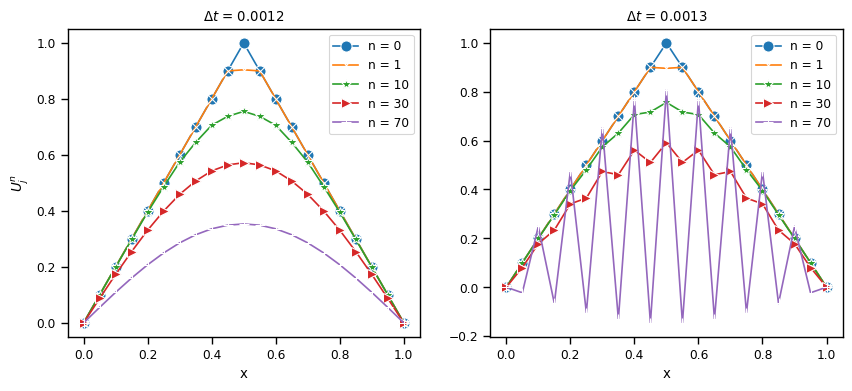

In [6]:
sns.set_context("paper")

h_plot = 2
v_plot = 1

fig, ax = plt.subplots(v_plot, h_plot,  figsize=(10, 4))

time_steps = [0, 1, 10, 30, 70]
markers_vec = ['o', 'x', "*", ">", "+"]
for i in range(h_plot):
    delta_t = delta_t_values[i]
    ### time step t = 0 ###
    n=0
    
    #calculate the initial condition U0
    U0 = []
    for j in range(J+1): 
        x = j*delta_x
        U0.append(initial_condition (x))   
    #ploting the IC
    sns.lineplot(x=x_values, y=U0, #color = colours[9],
    marker=markers_vec[time_steps.index(n)], markersize = 8,
    ax = ax[i], label = f"n = {n}")
    ax[i].set_title(r"$\Delta t$ = " + str(delta_t))
    ax[i].set_xlabel("x")
    ### time step t = delta_t ###
    n= 1
    #here I calculate the first row of results for n = 1 (U1)
    Un = [0]
    for j in range(1,J):
        Un.append(Un1_explicit_scheme (U0,j, delta_t, delta_x))    
    Un.append(0)
    #ploting the approximation for U1
    
    sns.lineplot(x=x_values, y=Un, 
    marker=markers_vec[time_steps.index(n)], markersize = 10,
    ax = ax[i], label = f"n = {n}") 
    

    for N in time_steps[2:]:
        while n < N:
            n = n+1
            Un1 = [0]
            for j in range(1,J):
                Un1.append(Un1_explicit_scheme (Un,j, delta_t, delta_x))   
            Un1.append(0)
            Un = Un1
        # here I plot the results for t =n * delta_t
        
        sns.lineplot(x=x_values, y=Un1, 
                     marker=markers_vec[time_steps.index(n)], markersize = 7,
                     ax = ax[i], label = f"n = {n}") 
ax[0].set_ylabel(r"$U_j^{n}$")

plt.savefig('images/Question4-fig2-other_time_steps.png', dpi = 500, bbox_inches = 'tight') #facecolor='white'